In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
from sklearn.datasets import fetch_california_housing

In [38]:
data=fetch_california_housing( data_home=None, download_if_missing=True, return_X_y=False, as_frame=True)
df=data.copy()


In [5]:
data.data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [6]:
data['target'].isnull().sum()

0

In [107]:
data['target']

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [7]:
data.data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [8]:
data.data.duplicated().sum()

0

In [9]:
data.data.sample(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
8799,10.1447,26.0,7.203409,0.995455,2540.0,2.886364,33.77,-118.37
18378,8.0595,17.0,8.188406,1.057971,1052.0,3.049275,37.22,-121.87
15641,2.0987,52.0,3.211799,1.078337,1576.0,1.524178,37.80,-122.42
6781,4.1661,31.0,5.296571,1.069509,2639.0,2.445783,34.11,-118.16
4105,4.2415,41.0,5.105016,1.064263,1237.0,1.938871,34.12,-118.34


In [32]:
data.data['Target']=data['target']

In [67]:
df=data.data

In [73]:
x=df.drop(df[['Longitude','AveBedrms','Population']],axis=1,inplace=True)

C:\Users\djdeb\AppData\Local\Temp\ipykernel_15988\3995073591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x=df.drop(df[['Longitude','AveBedrms','Population']],axis=1,inplace=True)


<Axes: xlabel='MedHouseVal', ylabel='Count'>

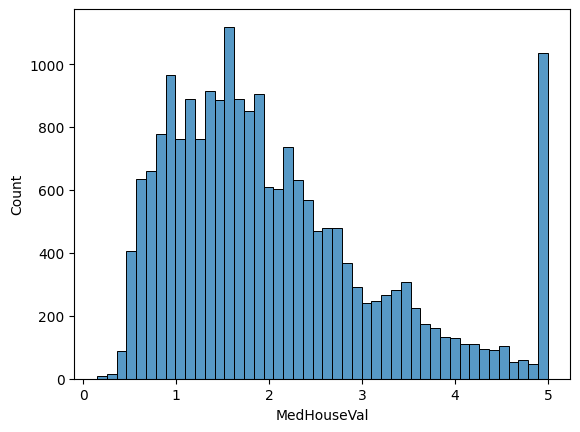

In [104]:
sns.histplot(data['target'])

In [34]:
data.data.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [43]:
X=data.data
y=data['target']

In [45]:
X.shape

(20640, 8)

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [47]:
lr=LinearRegression()

In [48]:
lr.fit(X_train,y_train)

LinearRegression()

In [50]:
y_pred=lr.predict(X_test)


In [51]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [53]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r=r2_score(y_test,y_pred)
print(mse,mae,r)

0.555891598695244 0.533200130495656 0.5757877060324511


In [60]:
print('adjusted r2 score:',1-((1-r)*(len(X_train)-1)/(len(X_train-9))))

adjusted r2 score: 0.5758133971839753


<Axes: xlabel='MedHouseVal', ylabel='MedHouseVal'>

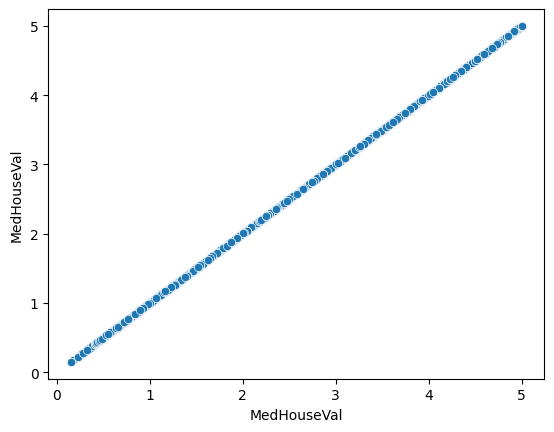

In [30]:
sns.scatterplot(x=data['target'],y=data['target'])

In [58]:
lr.coef_

array([ 4.48674910e-01,  9.72425752e-03, -1.23323343e-01,  7.83144907e-01,
       -2.02962058e-06, -3.52631849e-03, -4.19792487e-01, -4.33708065e-01])

In [90]:
sreg.coef_

array([ 1.03693092e+11,  4.11939487e+11,  1.93753423e+11,  1.17768815e+11,
        4.16232062e+11, -6.95330273e+11,  3.36910396e+11, -2.78071407e+10])

In [59]:
from sklearn.linear_model import SGDRegressor

In [61]:
sreg=SGDRegressor()
sreg.fit(X_train,y_train)

SGDRegressor()

In [62]:
y_pred_sreg=sreg.predict(X_test)

In [63]:
mse_SGD=mean_squared_error(y_test,y_pred_sreg)
mae_SGD=mean_absolute_error(y_test,y_pred_sreg)
r_SGD=r2_score(y_test,y_pred_sreg)
print(mse_SGD,mae_SGD,r_SGD)

5.955771633498691e+29 618376296972965.5 -4.544971632820886e+29


In [64]:
print('adjusted r2 score:',1-((1-r_SGD)*(len(X_train)-1)/(len(X_train-9))))

adjusted r2 score: -4.544696380178394e+29


In [86]:
x_train,x_test,Y_train,Y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [87]:
lr1=LinearRegression()
lr1.fit(x_train,Y_train)

LinearRegression()

In [88]:
Y_pred=lr1.predict(x_test)

In [89]:
print(mean_squared_error(Y_pred,Y_test))

0.6479945669253744


In [91]:
Sreg=SGDRegressor()
Sreg.fit(x_train,Y_train)

SGDRegressor()

In [92]:
Y_pred_sreg=Sreg.predict(x_test)

In [93]:
print(mean_squared_error(Y_pred_sreg,Y_test))

7.517642302669661e+21


In [94]:
Sreg.coef_

array([ 6.72128479e+08, -4.49768422e+08, -6.42913050e+07,  1.18103808e+10,
       -2.51922182e+09])

In [95]:
lr1.coef_

array([ 0.43902272,  0.01701664, -0.02208998, -0.00406749, -0.04508357])

In [100]:
print('R2 score of lr1 model:',r2_score(Y_test,Y_pred))

R2 score of lr1 model: 0.5055020396798212
